# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import os
from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [2]:
df = pd.read_csv("data/checker_timestamp.csv")
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df

,timestamp,date,hour
0,2020-04-17 05:19:02.744528,2020-04-17,5
1,2020-04-17 05:22:35.249331,2020-04-17,5
2,2020-04-17 05:22:45.549397,2020-04-17,5
3,2020-04-17 05:34:14.691200,2020-04-17,5
4,2020-04-17 05:34:24.422370,2020-04-17,5
...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20
3203,2020-05-21 20:22:41.785725,2020-05-21,20
3204,2020-05-21 20:22:41.877806,2020-05-21,20
3205,2020-05-21 20:37:00.129678,2020-05-21,20


In [4]:
df['am'] = (df['hour'] < 12).astype(int)
df['pm'] = (df['hour'] >= 12).astype(int)
df

,timestamp,date,hour,am,pm
0,2020-04-17 05:19:02.744528,2020-04-17,5,1,0
1,2020-04-17 05:22:35.249331,2020-04-17,5,1,0
2,2020-04-17 05:22:45.549397,2020-04-17,5,1,0
3,2020-04-17 05:34:14.691200,2020-04-17,5,1,0
4,2020-04-17 05:34:24.422370,2020-04-17,5,1,0
...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,0,1
3203,2020-05-21 20:22:41.785725,2020-05-21,20,0,1
3204,2020-05-21 20:22:41.877806,2020-05-21,20,0,1
3205,2020-05-21 20:37:00.129678,2020-05-21,20,0,1


In [5]:
df = df.groupby('date').agg(
    am=('am', 'sum'),
    pm=('pm', 'sum')
).reset_index()

df['date'] = pd.to_datetime(df['date'])
df['target'] = df['date'].dt.dayofweek.apply(lambda x: 'weekend' if x >= 5 else 'working_day')
df['date'] = df['date'].astype(str)
df

,date,am,pm,target
0,2020-04-17,21,2,working_day
1,2020-04-18,1,68,weekend
2,2020-04-19,18,15,weekend
3,2020-04-20,2,23,working_day
4,2020-04-21,0,25,working_day
5,2020-04-22,0,28,working_day
6,2020-04-23,10,33,working_day
7,2020-04-24,2,14,working_day
8,2020-04-25,30,74,weekend
9,2020-04-26,28,233,weekend


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

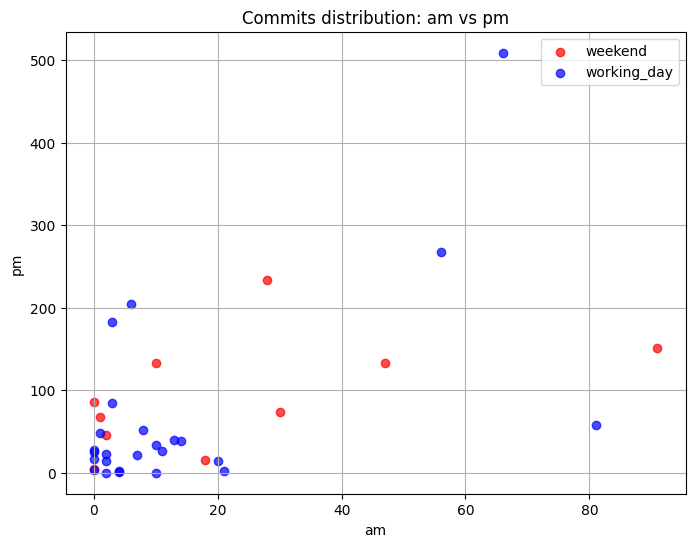

In [6]:
colors = {'working_day': 'blue', 'weekend': 'red'}

plt.figure(figsize=(8, 6))
for label, group in df.groupby('target'):
    plt.scatter(group['am'], group['pm'],
                label=label, color=colors[label], alpha=0.7)

plt.xlabel('am')
plt.ylabel('pm')
plt.title('Commits distribution: am vs pm')
plt.legend()
plt.grid(True)
plt.show()


### Answer:
No, it is  not easy

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [7]:
df['target_num'] = df['target'].map({'working_day': 0, 'weekend': 1})
df

,date,am,pm,target,target_num
0,2020-04-17,21,2,working_day,0
1,2020-04-18,1,68,weekend,1
2,2020-04-19,18,15,weekend,1
3,2020-04-20,2,23,working_day,0
4,2020-04-21,0,25,working_day,0
5,2020-04-22,0,28,working_day,0
6,2020-04-23,10,33,working_day,0
7,2020-04-24,2,14,working_day,0
8,2020-04-25,30,74,weekend,1
9,2020-04-26,28,233,weekend,1


In [8]:
X = df[['am', 'pm']]
y = df['target_num']

In [9]:
model = LogisticRegression(random_state=21, fit_intercept=False)
# agar fit_intercept=False -> y = w1*x1 + w2*x2 + ... + wn*xn
# agar fit_intercept=True -> y = w1*x1 + w2*x2 + ... + wn*xn + b

model.fit(X, y) # fit() — modelni o‘qitadi.
df['predict'] = model.predict(X) # predict() — o‘rgatilgan model yordamida bashorat qiladi.
df

,date,am,pm,target,target_num,predict
0,2020-04-17,21,2,working_day,0,1
1,2020-04-18,1,68,weekend,1,0
2,2020-04-19,18,15,weekend,1,0
3,2020-04-20,2,23,working_day,0,0
4,2020-04-21,0,25,working_day,0,0
5,2020-04-22,0,28,working_day,0,0
6,2020-04-23,10,33,working_day,0,0
7,2020-04-24,2,14,working_day,0,0
8,2020-04-25,30,74,weekend,1,0
9,2020-04-26,28,233,weekend,1,0


In [10]:
os.makedirs("data", exist_ok=True)
df.to_csv("data/am_pm.csv", index=False)

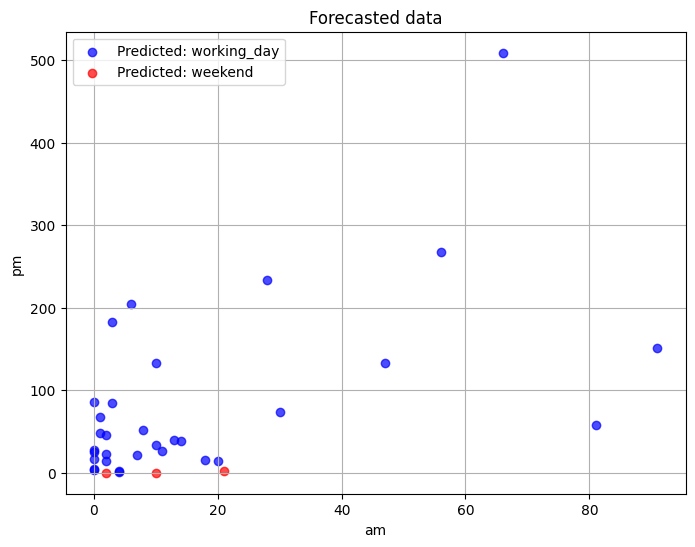

In [11]:
predict_colors = {0: 'blue', 1: 'red'}

plt.figure(figsize=(8, 6))
for label, group in df.groupby('predict'):
    plt.scatter(group['am'], group['pm'],
                label=f'Predicted: {"working_day" if label==0 else "weekend"}',
                color=predict_colors[label], alpha=0.7)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('Forecasted data')
plt.legend()
plt.grid(True)
plt.show()

### Answer:
no, it is not good

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [12]:
# Model bashoratlari uchun accuracy(aniqligi)
model_accuracy = accuracy_score(df['target_num'], df['predict']) # Accuracy= Jami bashoratlar soni / To’g’ri bashoratlar soni
print("Logistic Regression Accuracy:", model_accuracy)

Logistic Regression Accuracy: 0.6285714285714286


In [13]:
# Eng ko‘p uchragan sinfni topamiz
most_common_class = df['target_num'].mode()[0]

# Barcha qiymatlarni shu sinf deb bashorat qilamiz
naive_predictions = [most_common_class] * len(df)

# Naive model accuracy
naive_accuracy = accuracy_score(df['target_num'], naive_predictions)
print("Naive Model Accuracy:", naive_accuracy)

Naive Model Accuracy: 0.7142857142857143


### Answer:
no, it is not good